In [107]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import scipy.stats

# Ques 1

In [108]:
def linear_regression(X,Y, sig):
    
    chi2 = 0
    S = 0
    Sx = 0
    Sy = 0
    Sxx = 0
    Sxy = 0
    Syy = 0
    Y1 = [0 for i in range(len(X))]
    
    for i in range(len(X)):
        
        S = S + 1/(sig[i]**2)
        Sx = Sx + X[i]/(sig[i]**2)
        Sy = Sy + Y[i]/(sig[i]**2)
        Sxx = Sxx + (X[i]**2)/(sig[i]**2)
        Sxy = Sxy + (X[i]*Y[i])/(sig[i]**2)
        
    delta = S*Sxx - (Sx**2)
    a = (Sxx*Sy - Sx*Sxy)/delta
    b = (S*Sxy - Sx*Sy)/delta
        
    covab = -Sx/delta
    sig2_a = Sxx/delta
    err_a = math.sqrt(sig2_a)
    sig2_b = S/delta
    err_b = math.sqrt(sig2_b)
    for i in range(len(X)):
        Y1[i] = a + b * X[i]
        chi2 = chi2 + ((Y[i] - Y1[i])/sig[i])**2
        
    return a,b, covab, err_a, err_b

def readfile(filename,start):
    with open(filename,"r+") as f:
        lines = f.readlines()
        A=[]
        for i in range(start,len(lines)):
            A.append([float(j) for j in lines[i].split()])
        del lines
        return A

In [109]:

# Read data from file
data = pd.read_csv('esemfit.txt', sep='\s+', header=None)
time = data.iloc[:, 0]
counts = data.iloc[:, 1]
sigma = data.iloc[:, 2]

# Calculating log
ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

In [110]:

a,t, covab, err_a, err_b=linear_regression(time, ln_counts , sigma_ln_counts)


In [111]:
lifetime = -1/t
print('the lifetime of the radioactive material was',lifetime)

error = lifetime * np.sqrt(np.sum(sigma_ln_counts ** 2) / (len(time) - 2))
print('The error in the lifetime was',error)

the lifetime of the radioactive material was 110.0380598212136
The error in the lifetime was 17.042096605166556


The fit is acceptable at the 5% level of significance.


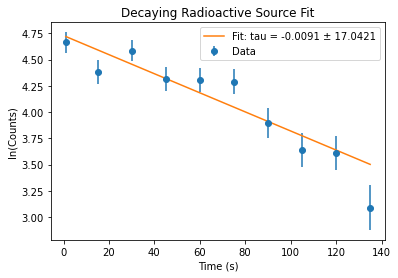

Lifetime: 110.0381 ± 17.0421 s


In [112]:
# Check if the fit is acceptable at the 5% level of significance
alpha = 0.05
df = len(time) - 2 
critical = scipy.stats.chi2.ppf(1 - alpha, df)

# Calculate reduced χ²
reduced_chi_square = (np.sum(((ln_counts - a - t * time) / sigma_ln_counts) ** 2) / (len(time) - 2))

if reduced_chi_square < critical:
    print(f'The fit is acceptable at the 5% level of significance.')
else:
    print(f'The fit is NOT acceptable at the 5% level of significance.')
    
# Plot data and fit
plt.errorbar(time, ln_counts, yerr=sigma_ln_counts, fmt='o', label='Data')
plt.plot(time, a + t * time, label=f'Fit: tau = {t:.4f} ± {error:.4f}')
plt.xlabel('Time (s)')
plt.ylabel('ln(Counts)')
plt.title('Decaying Radioactive Source Fit')
plt.legend()
plt.show()

# Print results
print(f'Lifetime: {lifetime:.4f} ± {error:.4f} s')

# Ques 2 :

In [33]:
import numpy as np

# Constants
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422
T = 300

# Fixed point function for V
def f(V):
    return b + R*T/(p + a/(V**2))

V = 1.0 # Initial guess for V
e = 1e-5#Tolerance
i = 1000#iterations

#Fixed point iterations
for i in range(i):
    Vn = f(V)
    diff = np.abs(Vn - V)
    if diff < e:
        break
    V = Vn

# Print the result
print("V = {:.5f} L".format(V))
print("Number of iterations: {}".format(i+1))

V = 3.92995 L
Number of iterations: 9


In [42]:
#for another fixed point equation

P = 5.95
R = 0.0821
a = 6.254
b = 0.05422
T = 300

def f(V):
    return np.sqrt(a*(V-b)/R*T-P*(V-b))

V = 1.0 # Initial guess for V
e = 1e-5
i = 1000

#Fixed point iterations
for i in range(i):
    Vn = f(V)
    diff = np.abs(Vn - V)
    if diff < e:
        break
    V = Vn

# Print the result
print("V = {:.5f} L".format(V))
print("Number of iterations: {}".format(i+1))


V = 22846.61452 L
Number of iterations: 35


Here, we can see that for different fixed point equations , we get different solutions for different fixed point equations, it is because we calculate from a fixed point, and take difference as we iterate, for different curves, that might be different.

# Ques 5:

In [29]:
Q=readfile("matrix5.txt",0)
print(Q)

[[2.0, -1.0, 0.0, 0.0, 0.0], [-1.0, 2.0, -1.0, 0.0, 0.0], [0.0, -1.0, 2.0, -1.0, 0.0], [0.0, 0.0, -1.0, 2.0, -1.0], [0.0, 0.0, 0.0, -1.0, 2.0]]


In [27]:
def power_method_find(A :list,x0: list,tol = 1e-6):
    A=np.array(A)
    x0=np.array(x0)
    x_copy = np.copy(x0)
    lam_0 = np.matmul(np.matmul(np.linalg.matrix_power(A,2),x0).T,np.matmul(np.linalg.matrix_power(A,1),x0))/np.matmul(np.matmul(np.linalg.matrix_power(A,1),x0).T,np.matmul(np.linalg.matrix_power(A,1),x0))
    lam_1 = np.matmul(np.matmul(np.linalg.matrix_power(A,3),x0).T,np.matmul(np.linalg.matrix_power(A,2),x0))/np.matmul(np.matmul(np.linalg.matrix_power(A,2),x0).T,np.matmul(np.linalg.matrix_power(A,2),x0))
    i=3
    while abs(lam_1-lam_0)>tol:
        lam_0 = lam_1
        lam_1 = np.matmul(np.matmul(np.linalg.matrix_power(A,i+1),x0).T,np.matmul(np.linalg.matrix_power(A,i),x0))/np.matmul(np.matmul(np.linalg.matrix_power(A,i),x0).T,np.matmul(np.linalg.matrix_power(A,i),x0))
        i+=1

    eigval = lam_1
    eigvec = np.matmul(np.linalg.matrix_power(A,i-1),x_copy)
    norm = np.linalg.norm(eigvec)
    eigvec = eigvec/norm
    return eigval,eigvec,i  

In [30]:
# the initial guess
x0 = np.array([1, 1, 1, 1,1])

eigval, eigvec,steps = power_method_find(Q, x0)

print("The results are as follows:")

print("Maximum Eigenvalue: ", np.round(eigval, 4))
print(f"Eigenvector corresponding to eigen value {round(eigval)}: ", np.round(eigvec, 4))
print("Number of steps: ", steps,"(to reach the tolerance of 1e-6)")

The results are as follows:
Maximum Eigenvalue:  3.7321
Eigenvector corresponding to eigen value 4:  [ 0.2889 -0.5     0.5772 -0.5     0.2889]
Number of steps:  16 (to reach the tolerance of 1e-6)


# Ques 6

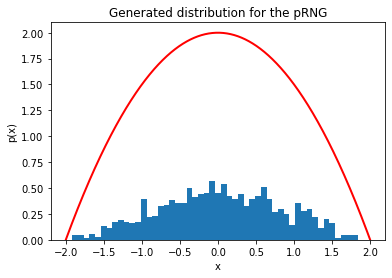

Success probability: 0.9090


In [46]:
#Using accept/reject method to generate pseudo random numbers.
#given  in the question
a = 2
n = 1000

# Generating the Gaussian distributed samples
gauss = np.random.normal(0, 1, num_samples)

samples = [] #accepted samples
for x in gauss:
    if np.abs(x) < a and np.random.uniform(0, 1) < 0.5 * (a**2 - x**2):
        samples.append(x)

# Plotting the generated distribution
plt.hist(samples, bins=50, density=True)
x = np.linspace(-a, a, 1000)
y = 0.5 * (a**2 - x**2)
plt.plot(x, y, 'r', linewidth=2)
plt.title('Generated distribution for the pRNG')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

# Calculating success probability
success_probability = len(samples) / n
print(f'Success probability: {success_probability:.4f}')

# Ques 7

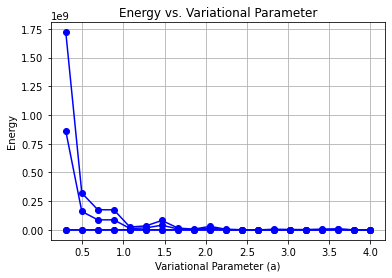

Minimum Energy: (-25883.844032390603, 860360936.9669632, 1720721875.9339151, -51767.688611258665)
Optimal Variational Parameter (a): 0.8842105263157896


In [106]:
#Define trial function
def wf(x,alpha):#trial wavefunction
    return 0.5*(alpha**2-x**2)


#define prob density
def prob_density(x,alpha):#The given trial wave function
    return 0.25*(alpha**2-x**2)**2

#define E local
def E_local(x,alpha):#The local energy calculated in the text
    return (-2)/(alpha**2-x**2)-x**2/2

def metropolis(N, alpha):
    L = 3/np.sqrt(2*alpha) #The length of the well
    x = np.random.rand()*2*L-L #random number from -L to L
    E = 0
    E2 = 0
    Eln_average = 0
    ln_average = 0
    rejection_ratio = 0
    for i in range(N):
        x_trial = x + 0.4*(np.random.rand()*2*L-L)
        #x_trial = np.random.rand()*2*L-L
        if prob_density(x_trial,alpha) >= prob_density(x,alpha):
            x = x_trial
        else:
            dummy = np.random.rand()
            if dummy < prob_density(x_trial,alpha)/prob_density(x,alpha):
                x = x_trial
            else:
                rejection_ratio += 1/N
        E += E_local(x,alpha)/N
        E2 += E_local(x,alpha)**2/N
        Eln_average += (E_local(x, alpha)*-x**2)/N
        ln_average += -x**2/N

    return E, E2, Eln_average, ln_average


num_steps = 20000
num_a_values = 20
a_values = np.linspace(0.3, 4, num_a_values)

energies = []
for a in a_values:
    energy = metropolis(num_steps, a)
    energies.append(energy)

# Find the minimum energy and the corresponding optimal alpha value
min_energy = min(energies)
optimal_a = a_values[np.argmin(energies)]

# Plot the energy as a function of alpha
plt.plot(a_values, energies, marker='o', color='b', linestyle='-')
plt.xlabel('Variational Parameter (a)')
plt.ylabel('Energy')
plt.title('Energy vs. Variational Parameter')
plt.grid(True)
plt.show()

print("Minimum Energy:", min_energy)
print("Optimal Variational Parameter (a):", optimal_a)